In [1]:
#Haris Amaldi
#Dilarang mengcopy code. PLAGIARISME ITU HARAM!!!!

In [2]:
#Membuka file dataset
!unzip datafilm.zip

Archive:  datafilm.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [3]:
#Mengimport fungsi-fungsi yang dibutuhkan dan mencari banyaknya data film dan pengguna yang tercatat.
import os
import plotly.express as px
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import re
from sklearn.neighbors import NearestNeighbors
import random
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

film = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")

print('Jumlah data film: ', len(film.movieId.unique()))
print('Jumlah data pengguna: ', len(rating.userId.unique()))

Jumlah data film:  9742
Jumlah data pengguna:  610


In [4]:
#Melihat bentuk data film
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
#Melihat bentuk data rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# Menggabungkan seluruh movieId pada kategori film dan rating
film_all = np.concatenate((
    film.movieId.unique(),
    rating.movieId.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
film_all = np.sort(np.unique(film_all))
 
print('Jumlah seluruh data film berdasarkan movieID: ', len(film_all))

Jumlah seluruh data film berdasarkan movieID:  9742


In [7]:
filmrating = pd.merge(film, rating , on='movieId', how='left')
filmrating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


In [8]:
print("Rating yang tersedia:", filmrating.rating.unique())

Rating yang tersedia: [4.  4.5 2.5 3.5 3.  5.  0.5 2.  1.5 1.  nan]


In [9]:
filmrating.isnull().sum()

movieId       0
title         0
genres        0
userId       18
rating       18
timestamp    18
dtype: int64

In [10]:
filmrating = filmrating.dropna()
filmrating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09


In [11]:
# Memisahkan tahun rilis film menjadi 1 kolom sendiri
filmrating['tahunrilis'] = filmrating.title.str.extract('.*\((.*)\).*')
filmrating.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genres,userId,rating,timestamp,tahunrilis
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,1995


In [12]:
# Menghapus tahun dari kolom judul
filmrating['title'] = filmrating.title.str.split('(').str[0].str[:-1]
filmrating.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genres,userId,rating,timestamp,tahunrilis
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,1995


In [13]:
#mengubah timestamp menjadi data yang bisa dibaca
def UNIX_to_Readable(df):
    return pd.to_datetime(datetime.fromtimestamp(df).strftime('%Y-%m-%d %H:%M:%S'))


filmrating.timestamp = filmrating.timestamp.apply(UNIX_to_Readable)
filmrating.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,movieId,title,genres,userId,rating,timestamp,tahunrilis
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1996-11-08 06:36:02,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,2005-01-25 06:52:26,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,2017-11-13 12:59:30,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,2011-05-18 05:28:03,1995


In [14]:
# Menghapus nilai rating berkoma (Tidak bulat)
filmrating.rating = np.ceil(filmrating.rating)
print("Rating yang tersedia:", filmrating.rating.unique())

Rating yang tersedia: [4. 5. 3. 1. 2.]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
#Pengujian penambahan Jumlah rating agar ketahuan apakah ada yang hanya dirating kurang dari 10 pengguna.
filmrating.groupby('movieId').sum()

,userId,rating
movieId,,
1,65904.0,866.0
2,36251.0,394.0
3,14747.0,174.0
4,1539.0,17.0
5,14679.0,154.0
...,...,...
193581,184.0,4.0
193583,184.0,4.0
193585,184.0,4.0


In [16]:
#Ada yang jumlah ratingnya dibawah rentang 10-50. Harus dihapus terlebih dahulu biar lebih cepat dan efektif.
movieFrequency_greater_10 = filmrating['movieId'].value_counts()[filmrating['movieId'].value_counts() >= 10].index
filmrating = filmrating[filmrating.movieId.isin(movieFrequency_greater_10)]

In [17]:
#Preparasi data
preparasi = filmrating
preparasi.sort_values('movieId')

,movieId,title,genres,userId,rating,timestamp,tahunrilis
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,1995
137,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,382.0,5.0,2018-01-05 14:30:28,1995
138,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,385.0,4.0,1996-06-13 18:47:22,1995
139,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,389.0,5.0,1997-03-09 19:02:54,1995
140,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,391.0,3.0,2002-09-18 22:27:57,1995
...,...,...,...,...,...,...,...
100804,187593,Deadpool 2,Action|Comedy|Sci-Fi,62.0,4.0,2018-05-25 18:47:51,2018
100803,187593,Deadpool 2,Action|Comedy|Sci-Fi,25.0,5.0,2018-08-28 15:35:34,2018
100813,187593,Deadpool 2,Action|Comedy|Sci-Fi,514.0,4.0,2018-09-17 02:18:46,2018
100807,187593,Deadpool 2,Action|Comedy|Sci-Fi,248.0,5.0,2018-08-18 13:45:09,2018


In [18]:
preparasi = preparasi.drop_duplicates('movieId')
preparasi

,movieId,title,genres,userId,rating,timestamp,tahunrilis
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,1995
215,2,Jumanji,Adventure|Children|Fantasy,6.0,4.0,1996-10-17 11:58:42,1995
325,3,Grumpier Old Men,Comedy|Romance,1.0,4.0,2000-07-30 18:20:47,1995
384,5,Father of the Bride Part II,Comedy,6.0,5.0,1996-10-17 12:05:38,1995
433,6,Heat,Action|Crime|Thriller,1.0,4.0,2000-07-30 18:37:04,1995
...,...,...,...,...,...,...,...
100526,174055,Dunkirk,Action|Drama|Thriller|War,50.0,3.0,2018-02-09 09:30:47,2017
100594,176371,Blade Runner 2049,Sci-Fi,25.0,4.0,2018-08-28 15:34:29,2017
100641,177765,Coco,Adventure|Animation|Children,89.0,2.0,2018-03-07 07:38:02,2017
100688,179819,Star Wars: The Last Jedi,Action|Adventure|Fantasy|Sci-Fi,62.0,4.0,2018-04-06 21:03:25,2017


In [19]:
Idfilm = preparasi['movieId'].tolist()
Judul = preparasi['title'].tolist()
Genre = preparasi['genres'].tolist()

print(len(Idfilm))
print(len(Judul))
print(len(Genre))

2269
2269
2269


In [20]:
#Membuat dictionary baru
dictbaru = pd.DataFrame({
    'idfilm': Idfilm,
    'Judulfilm': Judul,
    'Genrefilm': Genre
})
dictbaru

,idfilm,Judulfilm,Genrefilm
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,5,Father of the Bride Part II,Comedy
4,6,Heat,Action|Crime|Thriller
...,...,...,...
2264,174055,Dunkirk,Action|Drama|Thriller|War
2265,176371,Blade Runner 2049,Sci-Fi
2266,177765,Coco,Adventure|Animation|Children
2267,179819,Star Wars: The Last Jedi,Action|Adventure|Fantasy|Sci-Fi


Ini content based filtering

In [21]:
data = dictbaru
data.sample(5)

,idfilm,Judulfilm,Genrefilm
1404,4718,American Pie 2,Comedy
725,1947,West Side Story,Drama|Musical|Romance
1716,27706,Lemony Snicket's A Series of Unfortunate Events,Adventure|Children|Comedy|Fantasy
1009,2792,Airplane II: The Sequel,Comedy
1416,4873,Waking Life,Animation|Drama|Fantasy


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre film
tf.fit(data['Genrefilm']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'horror',
 'imax',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [23]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['Genrefilm']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(2269, 21)

In [24]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.37515221, 0.54947369, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.47780142, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.44980472, 0.65881488, ..., 0.        , 0.        ,
         0.        ],
        [0.36542737, 0.41020987, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.44882101, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [25]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre film
# Baris diisi dengan judul film
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.Judulfilm
).sample(21, axis=1).sample(10, axis=0)

,war,romance,thriller,documentary,comedy,film,children,imax,adventure,musical,...,sci,fi,action,drama,crime,fantasy,western,mystery,noir,horror
Judulfilm,,,,,,,,,,,,,,,,,,,,,
Circle of Friends,0.0,0.820414,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.571770,0.0,0.000000,0.000000,0.00000,0.0,0.0
Dirty Dancing,0.0,0.502153,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.790802,...,0.0,0.0,0.0,0.349965,0.0,0.000000,0.000000,0.00000,0.0,0.0
Lone Star,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.292237,0.0,0.000000,0.774633,0.56084,0.0,0.0
"Karate Kid, The",0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
Dancer in the Dark,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.914455,...,0.0,0.0,0.0,0.404687,0.0,0.000000,0.000000,0.00000,0.0,0.0
Secrets & Lies,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
Groundhog Day,0.0,0.585031,0.0,0.0,0.419904,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.693844,0.000000,0.00000,0.0,0.0
Silver Linings Playbook,0.0,0.000000,0.0,0.0,0.717434,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.696626,0.0,0.000000,0.000000,0.00000,0.0,0.0
Bridget Jones: The Edge of Reason,0.0,0.706953,0.0,0.0,0.507413,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.492696,0.0,0.000000,0.000000,0.00000,0.0,0.0


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.78516345, 0.16656305, ..., 0.83403351, 0.39750186,
        0.10958345],
       [0.78516345, 1.        , 0.        , ..., 0.60118955, 0.50626638,
        0.        ],
       [0.16656305, 0.        , 1.        , ..., 0.        , 0.        ,
        0.22369144],
       ...,
       [0.83403351, 0.60118955, 0.        , ..., 1.        , 0.18451433,
        0.        ],
       [0.39750186, 0.50626638, 0.        , ..., 0.18451433, 1.        ,
        0.69437005],
       [0.10958345, 0.        , 0.22369144, ..., 0.        , 0.69437005,
        1.        ]])

In [27]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Judulfilm'], columns=data['Judulfilm'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap judul film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2269, 2269)


Judulfilm,"Dukes of Hazzard, The","Princess Diaries, The",Lost in Translation,Reindeer Games,Buffy the Vampire Slayer
Judulfilm,,,,,
Heartbreakers,0.216209,0.523459,0.652836,0.000000,0.180301
Bubba Ho-tep,0.232535,0.191417,0.238727,0.000000,0.876055
"Recruit, The",0.400402,0.000000,0.000000,1.000000,0.333902
Son in Law,0.250790,0.607181,1.000000,0.000000,0.209138
Breakfast at Tiffany's,0.000000,0.465053,0.861703,0.000000,0.000000
Star Trek VI: The Undiscovered Country,0.222228,0.000000,0.000000,0.266114,0.185320
Mission: Impossible II,0.714494,0.000000,0.000000,0.789536,0.263628
Out of Sight,0.178644,0.432511,0.712326,0.317882,0.148975
Frida,0.000000,0.465053,0.861703,0.000000,0.000000


In [28]:
def film_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['Judulfilm', 'Genrefilm']], k=5):
 
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_film agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [29]:
data[data.Judulfilm.eq('Toy Story')]

,idfilm,Judulfilm,Genrefilm
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy


In [30]:
film_recommendations('Toy Story')

,Judulfilm,Genrefilm
0,"Emperor's New Groove, The",Adventure|Animation|Children|Comedy|Fantasy
1,Moana,Adventure|Animation|Children|Comedy|Fantasy
2,"Monsters, Inc.",Adventure|Animation|Children|Comedy|Fantasy
3,Antz,Adventure|Animation|Children|Comedy|Fantasy
4,Toy Story 2,Adventure|Animation|Children|Comedy|Fantasy


In [31]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

# Membaca dataset
 
df = preparasi
df

,movieId,title,genres,userId,rating,timestamp,tahunrilis
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30 18:45:03,1995
215,2,Jumanji,Adventure|Children|Fantasy,6.0,4.0,1996-10-17 11:58:42,1995
325,3,Grumpier Old Men,Comedy|Romance,1.0,4.0,2000-07-30 18:20:47,1995
384,5,Father of the Bride Part II,Comedy,6.0,5.0,1996-10-17 12:05:38,1995
433,6,Heat,Action|Crime|Thriller,1.0,4.0,2000-07-30 18:37:04,1995
...,...,...,...,...,...,...,...
100526,174055,Dunkirk,Action|Drama|Thriller|War,50.0,3.0,2018-02-09 09:30:47,2017
100594,176371,Blade Runner 2049,Sci-Fi,25.0,4.0,2018-08-28 15:34:29,2017
100641,177765,Coco,Adventure|Animation|Children,89.0,2.0,2018-03-07 07:38:02,2017
100688,179819,Star Wars: The Last Jedi,Action|Adventure|Fantasy|Sci-Fi,62.0,4.0,2018-04-06 21:03:25,2017


In [32]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1.0, 6.0, 151.0, 19.0, 84.0, 44.0, 78.0, 4.0, 28.0, 33.0, 23.0, 3.0, 5.0, 11.0, 45.0, 117.0, 90.0, 182.0, 16.0, 42.0, 79.0, 181.0, 15.0, 136.0, 14.0, 32.0, 57.0, 101.0, 58.0, 40.0, 2.0, 140.0, 135.0, 27.0, 18.0, 91.0, 43.0, 66.0, 38.0, 8.0, 31.0, 53.0, 7.0, 89.0, 50.0, 9.0, 74.0, 59.0, 186.0, 29.0, 64.0, 217.0, 20.0, 68.0, 10.0, 17.0, 156.0, 70.0, 13.0, 105.0, 51.0, 55.0, 48.0, 274.0, 12.0, 113.0, 104.0, 22.0, 100.0, 63.0, 160.0, 177.0, 92.0, 72.0, 219.0, 76.0, 21.0, 82.0, 24.0, 111.0, 95.0, 36.0, 60.0, 115.0, 138.0, 47.0, 39.0, 132.0, 41.0, 155.0, 226.0, 87.0, 34.0, 103.0, 80.0, 108.0, 298.0, 62.0, 232.0, 125.0, 139.0, 129.0, 73.0, 52.0, 83.0, 122.0, 98.0, 249.0, 154.0, 30.0, 148.0, 119.0, 184.0, 25.0]
encoded userID :  {1.0: 0, 6.0: 1, 151.0: 2, 19.0: 3, 84.0: 4, 44.0: 5, 78.0: 6, 4.0: 7, 28.0: 8, 33.0: 9, 23.0: 10, 3.0: 11, 5.0: 12, 11.0: 13, 45.0: 14, 117.0: 15, 90.0: 16, 182.0: 17, 16.0: 18, 42.0: 19, 79.0: 20, 181.0: 21, 15.0: 22, 136.0: 23, 14.0: 24, 32.0: 25, 57.

In [33]:
# Mengubah movieID menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding placeID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke placeID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [34]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah rmovie
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

114
2269
Number of User: 114, Number of movie: 2269, Min Rating: 1.0, Max Rating: 5.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [36]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,movieId,title,genres,userId,rating,timestamp,tahunrilis,user,movie
11022,372,Reality Bites,Comedy|Drama|Romance,19.0,1.0,2000-08-08 03:48:27,1994,3,188
59652,4023,"Family Man, The",Comedy|Drama|Romance,64.0,1.0,2006-10-23 01:13:12,2000,50,1321
71978,6709,Once Upon a Time in Mexico,Action|Adventure|Crime|Thriller,18.0,3.0,2016-03-02 11:53:52,2003,34,1586
68256,5673,Punch-Drunk Love,Comedy|Drama|Romance,22.0,1.0,2010-03-16 08:11:08,2002,67,1508
34943,1717,Scream 2,Comedy|Horror|Mystery|Thriller,19.0,3.0,2000-08-08 03:26:35,1997,3,674
...,...,...,...,...,...,...,...,...,...
74378,7293,50 First Dates,Comedy|Romance,10.0,4.0,2016-02-13 22:21:25,2004,54,1638
51441,3089,Bicycle Thieves,Drama,74.0,5.0,2008-04-06 17:02:31,1948,46,1095
52753,3252,Scent of a Woman,Drama,28.0,3.0,2009-05-11 09:00:17,1992,8,1130
58628,3972,"Legend of Drunken Master, The",Action|Comedy,20.0,3.0,2003-05-28 18:39:34,1994,52,1294


In [37]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[   3  188]
 [  50 1321]
 [  34 1586]
 ...
 [   8 1130]
 [  52 1294]
 [   0  860]] [0.  0.  0.5 ... 0.5 0.5 1. ]


In [38]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [39]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [40]:
# Memulai training
from keras import backend as K

 
history = model.fit(
    x = K.cast_to_floatx(x_train),
    y = K.cast_to_floatx(y_train),
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
227/227 [==============================] - 3s 5ms/step - loss: 0.6897 - root_mean_squared_error: 0.3101 - val_loss: 0.6847 - val_root_mean_squared_error: 0.2991
Epoch 2/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6441 - root_mean_squared_error: 0.2717 - val_loss: 0.6781 - val_root_mean_squared_error: 0.2935
Epoch 3/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6317 - root_mean_squared_error: 0.2613 - val_loss: 0.6743 - val_root_mean_squared_error: 0.2903
Epoch 4/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6237 - root_mean_squared_error: 0.2542 - val_loss: 0.6712 - val_root_mean_squared_error: 0.2877
Epoch 5/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6186 - root_mean_squared_error: 0.2496 - val_loss: 0.6684 - val_root_mean_squared_error: 0.2853
Epoch 6/100
227/227 [==============================] - 1s 4ms/step - loss: 0.6125 - root_mean_squared_error: 0.2441 - val_loss: 0.6660 

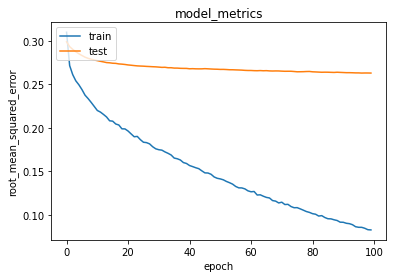

In [41]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
movie_df = dictbaru
df = filmrating

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['idfilm'].isin(movie_visited_by_user.movieId.values)]['idfilm'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [43]:
user_movie_array

array([[  83,    0],
       [  83, 2218],
       [  83,    1],
       ...,
       [  83, 1979],
       [  83, 2169],
       [  83, 2170]])

In [44]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['idfilm'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.Judulfilm, ':', row.Genrefilm)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['idfilm'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.Judulfilm, ':', row.Genrefilm)

Showing recommendations for users: 115.0
Movie with high ratings from user
--------------------------------
Star Wars: Episode V - The Empire Strikes Back : Action|Adventure|Sci-Fi
Apocalypse Now : Action|Drama|War
Full Metal Jacket : Drama|War
Terminator, The : Action|Sci-Fi|Thriller
Mulan : Adventure|Animation|Children|Comedy|Drama|Musical|Romance
--------------------------------
Top 10 movie recommendation
--------------------------------
West Side Story : Drama|Musical|Romance
Midnight Cowboy : Drama
French Connection, The : Action|Crime|Thriller
Chariots of Fire : Drama
Repo Man : Comedy|Sci-Fi
Exorcist, The : Horror|Mystery
Lethal Weapon 2 : Action|Comedy|Crime|Drama
Empire Records : Comedy|Drama
Solaris : Drama|Mystery|Sci-Fi
Frequency : Drama|Thriller
